In [72]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from plotly.graph_objs import *

import networkx as nx


# Inputs

In [2]:
os.listdir("../input/")

['Addresses.csv',
 'all_edges.csv',
 'Entities.csv',
 'Intermediaries.csv',
 'Officers.csv']

In [3]:
entities = pd.read_csv('../input/Entities.csv')
addresses = pd.read_csv('../input/Addresses.csv')
intermediaries = pd.read_csv('../input/Intermediaries.csv')
officers = pd.read_csv('../input/Officers.csv')
edges = pd.read_csv('../input/all_edges.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,2,5,6,9,10,11,12,13,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=comp

## Missing Data

In [4]:
# Check to see if there are any missing values in our data set
entities.isnull().any()

name                         True
original_name                True
former_name                  True
jurisdiction                False
jurisdiction_description    False
company_type                 True
address                      True
internal_id                  True
incorporation_date           True
inactivation_date            True
struck_off_date              True
dorm_date                    True
status                       True
service_provider             True
ibcRUC                       True
country_codes                True
countries                    True
note                         True
valid_until                 False
node_id                     False
sourceID                    False
dtype: bool

In [5]:
pd.DataFrame([entities.columns.values, 
addresses.columns.values,
 intermediaries.columns.values, 
 officers.columns.values, 
 edges.columns.values])

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
1,address,icij_id,valid_until,country_codes,countries,node_id,sourceID,note,None,None,...,None,None,None,None,None,None,None,None,None,None
2,name,internal_id,address,valid_until,country_codes,countries,status,node_id,sourceID,note,...,None,None,None,None,None,None,None,None,None,None
3,name,icij_id,valid_until,country_codes,countries,node_id,sourceID,note,None,None,...,None,None,None,None,None,None,None,None,None,None
4,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date,None,None,None,...,None,None,None,None,None,None,None,None,None,None


### Entities

In [6]:
entities.head(3)

,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,dorm_date,status,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID
0,"TIANSHENG INDUSTRY AND TRADING CO., LTD.","TIANSHENG INDUSTRY AND TRADING CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001256.0,23-MAR-2006,18-FEB-2013,...,NaN,Defaulted,Mossack Fonseca,25221,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000001,Panama Papers
1,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.","NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1001263.0,27-MAR-2006,27-FEB-2014,...,NaN,Defaulted,Mossack Fonseca,25249,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000002,Panama Papers
2,"HOTFOCUS CO., LTD.","HOTFOCUS CO., LTD.",NaN,SAM,Samoa,NaN,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,1000896.0,10-JAN-2006,15-FEB-2012,...,NaN,Defaulted,Mossack Fonseca,24138,HKG,Hong Kong,NaN,The Panama Papers data is current through 2015,10000003,Panama Papers


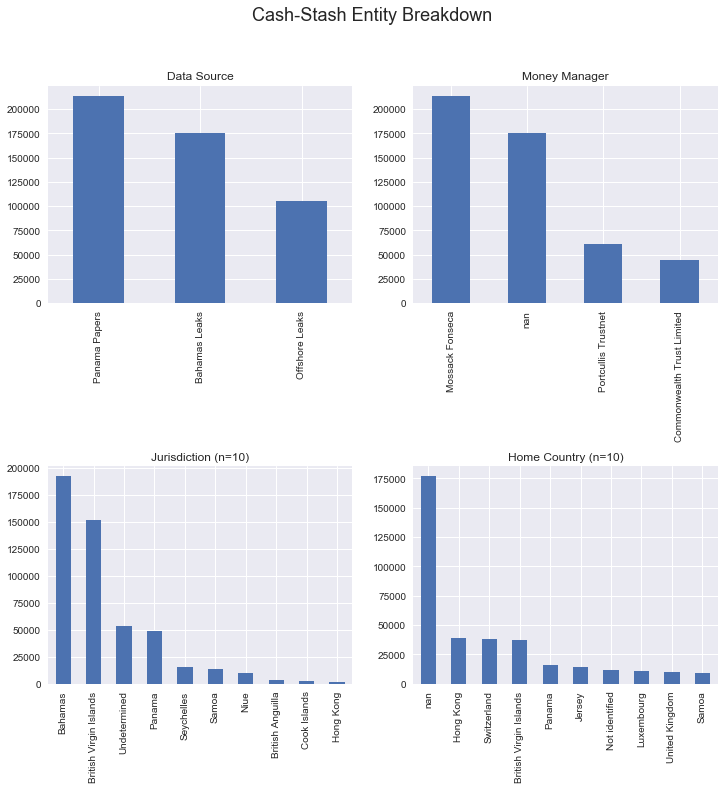

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

f, axarr = plt.subplots(2, 2, figsize=(12, 11))
f.subplots_adjust(hspace=0.75)
plt.suptitle('Cash-Stash Entity Breakdown', fontsize=18)

entities['sourceID'].value_counts().plot.bar(ax=axarr[0][0])
axarr[0][0].set_title("Data Source")

entities['service_provider'].value_counts(dropna=False).plot.bar(ax=axarr[0][1])
axarr[0][1].set_title("Money Manager")

entities['jurisdiction_description'].value_counts().head(10).plot.bar(ax=axarr[1][0])
axarr[1][0].set_title("Jurisdiction (n=10)")

entities['countries'].value_counts(dropna=False).head(10).plot.bar(ax=axarr[1][1])
axarr[1][1].set_title("Home Country (n=10)")

In [8]:
entities['DT.incorporation_dates'] = pd.to_datetime(entities.incorporation_date, format="%d-%b-%Y")
entities['DT.inactivation_dates']  = pd.to_datetime(entities.inactivation_date, format="%d-%b-%Y")

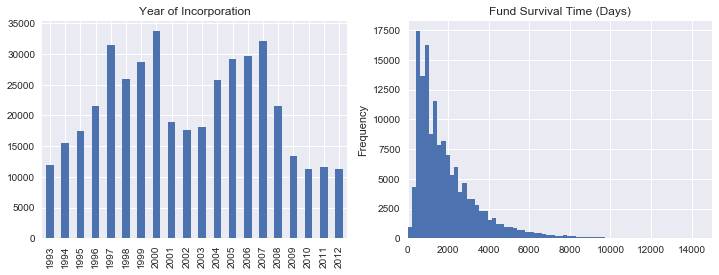

In [9]:
f, axarr = plt.subplots(1, 2, figsize=(12, 4))
f.subplots_adjust(hspace=0.75)

entities['DT.incorporation_dates'].dt.year.dropna().astype(int).value_counts().head(20).sort_index().plot.bar(
    ax=axarr[0]
)
axarr[0].set_title("Year of Incorporation")

(entities['DT.inactivation_dates'] - entities['DT.incorporation_dates']).dropna().map(lambda v: v.days).plot.hist(
    ax=axarr[1], bins=200
)
axarr[1].set_title("Fund Survival Time (Days)")
axarr[1].set_xlim([0, 15000])
pass

### Intermediaries

In [10]:
intermediaries.head()

,name,internal_id,address,valid_until,country_codes,countries,status,node_id,sourceID,note
0,"MICHAEL PAPAGEORGE, MR.",10001,MICHAEL PAPAGEORGE; MR. 106 NICHOLSON STREET B...,The Panama Papers data is current through 2015,ZAF,South Africa,ACTIVE,11000001,Panama Papers,NaN
1,CORFIDUCIA ANSTALT,10004,NaN,The Panama Papers data is current through 2015,LIE,Liechtenstein,ACTIVE,11000002,Panama Papers,NaN
2,"DAVID, RONALD",10014,NaN,The Panama Papers data is current through 2015,MCO,Monaco,SUSPENDED,11000003,Panama Papers,NaN
3,"DE BOUTSELIS, JEAN-PIERRE",10015,NaN,The Panama Papers data is current through 2015,BEL,Belgium,SUSPENDED,11000004,Panama Papers,NaN
4,THE LEVANT LAWYERS (TLL),10029,NaN,The Panama Papers data is current through 2015,LBN,Lebanon,ACTIVE,11000005,Panama Papers,NaN


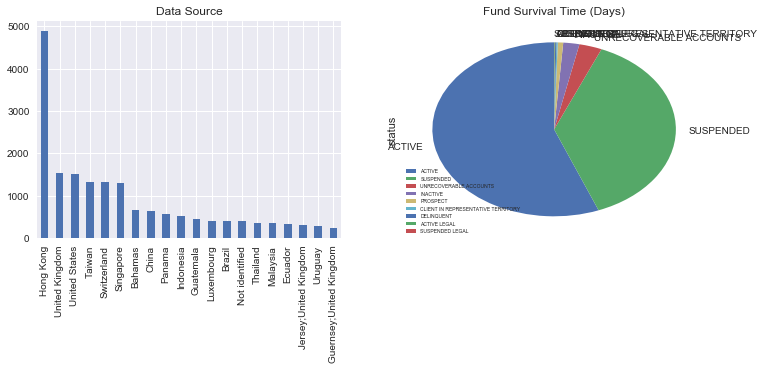

In [11]:
f, axarr = plt.subplots(1, 2, figsize=(12, 4))
f.subplots_adjust(hspace=0.75)

intermediaries['countries'].value_counts().head(20).plot.bar(ax=axarr[0])
axarr[0].set_title("Data Source")

intermediaries['status'].value_counts().head(10).plot.pie(ax=axarr[1], startangle=90).legend(loc=3, fontsize=5)
axarr[1].set_title("Fund Survival Time (Days)")



In [12]:
intermediaries['status'].value_counts(normalize=True, dropna = False).head(10)*100

NaN                                   47.797493
ACTIVE                                29.209579
SUSPENDED                             19.671589
UNRECOVERABLE ACCOUNTS                 1.580014
INACTIVE                               1.116764
PROSPECT                               0.372255
CLIENT IN REPRESENTATIVE TERRITORY     0.095132
DELINQUENT                             0.086859
ACTIVE LEGAL                           0.057906
SUSPENDED LEGAL                        0.012408
Name: status, dtype: float64

In [13]:
PopIntermediatries_Countries=list(intermediaries['countries'].value_counts().head(20).index)
PopIntermediatries_Status=list(['ACTIVE', 'SUSPENDED'])

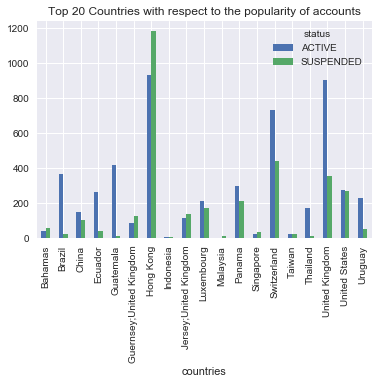

In [14]:
intermediaries[(intermediaries['status'].isin(PopIntermediatries_Status))&(intermediaries['countries'].isin(PopIntermediatries_Countries))].groupby(['countries', 'status']).size().unstack().plot(kind='bar', stacked=False)
plt.title("Top 20 Countries with respect to the popularity of accounts")

### Addresses

In [15]:
addresses.head()

,address,icij_id,valid_until,country_codes,countries,node_id,sourceID,note
0,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,6991059DFFB057DF310B9BF31CC4A0E6,The Panama Papers data is current through 2015,SGP,Singapore,14000001,Panama Papers,NaN
1,"""Almaly Village"" v.5, Almaty Kazakhstan",C65A269424AA1A8BBAC416FA30150938,The Panama Papers data is current through 2015,KAZ,Kazakhstan,14000002,Panama Papers,NaN
2,"""Cantonia"" South Road St Georges Hill Weybridg...",240EE44DFB70AF775E6CD02AF8CB889B,The Panama Papers data is current through 2015,GBR,United Kingdom,14000003,Panama Papers,NaN
3,"""CAY-OS"" NEW ROAD; ST.SAMPSON; GUERNSEY; CHANN...",340C6D3D2FC60AE58C53BB3618129C43,The Panama Papers data is current through 2015,GGY,Guernsey,14000004,Panama Papers,NaN
4,"""Chirag"" Plot No 652; Mwamba Road; Kizingo; Mo...",6DBCD74F5AAB63EABC166885CE8CD7CD,The Panama Papers data is current through 2015,KEN,Kenya,14000005,Panama Papers,NaN


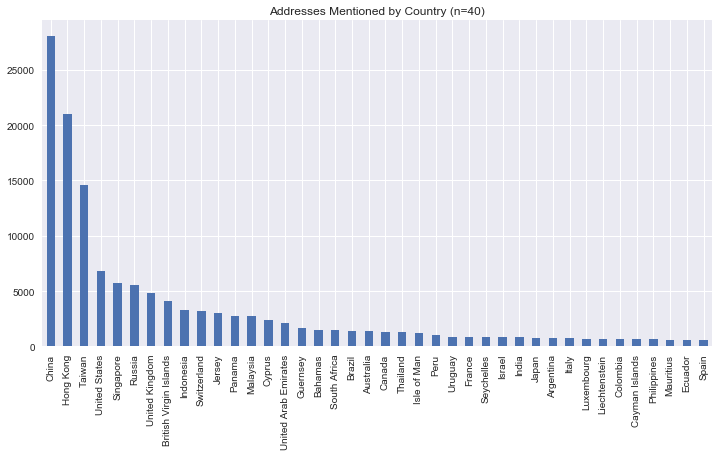

In [16]:
addresses['countries'].value_counts().head(40).plot.bar(
    title='Addresses Mentioned by Country (n=40)', figsize=(12, 6)
)

In [17]:
### officers

In [18]:
officers.head()

,name,icij_id,valid_until,country_codes,countries,node_id,sourceID,note
0,KIM SOO IN,E72326DEA50F1A9C2876E112AAEB42BC,The Panama Papers data is current through 2015,KOR,South Korea,12000001,Panama Papers,NaN
1,Tian Yuan,58287E0FD37852000D9D5AB8B27A2581,The Panama Papers data is current through 2015,CHN,China,12000002,Panama Papers,NaN
2,GREGORY JOHN SOLOMON,F476011509FD5C2EF98E9B1D74913CCE,The Panama Papers data is current through 2015,AUS,Australia,12000003,Panama Papers,NaN
3,MATSUDA MASUMI,974F420B2324A23EAF46F20E178AF52C,The Panama Papers data is current through 2015,JPN,Japan,12000004,Panama Papers,NaN
4,HO THUY NGA,06A0FC92656D09F63D966FE7BD076A45,The Panama Papers data is current through 2015,VNM,Viet Nam,12000005,Panama Papers,NaN


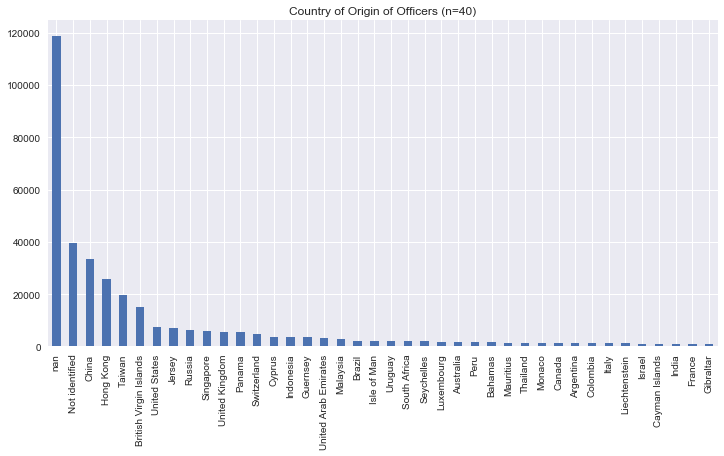

In [19]:
officers['countries'].value_counts(dropna=False).head(40).plot.bar(
    title='Country of Origin of Officers (n=40)', figsize=(12, 6)
)

### edges

In [20]:
edges.head()

,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date
0,11000001,intermediary of,10208879,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
1,11000001,intermediary of,10198662,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
2,11000001,intermediary of,10159927,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
3,11000001,intermediary of,10165779,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN
4,11000001,intermediary of,10152967,Panama Papers,The Panama Papers data is current through 2015,NaN,NaN


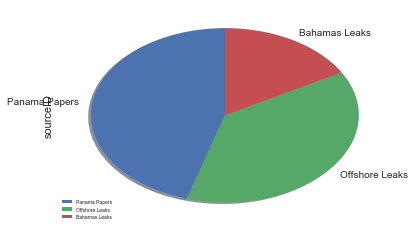

In [21]:
edges['sourceID'].value_counts().head(10).plot.pie(startangle=90, shadow= True).legend(loc=3, fontsize=5)
axarr[1].set_title("Fund Survival Time (Days)")

# Joining Data
attemps to join the merge the data


In [22]:
PopEdgess_rel=list(edges['rel_type'].value_counts().head(40).index)
# edges.rel_type.value_counts().head(40)

In [23]:
relationship2code = pd.DataFrame(PopEdgess_rel, columns=['relationship'])
relationship2code = relationship2code.assign(code=pd.Series([1] * len(PopEdgess_rel)).values)

Identical_rel_list=list(['similar name and address as', 'same name as', 'same company as',
                         'same name and registration date as', 'same address as', 'related entity',
                         'entity similar to','probably same officer as'])

relationship2code.loc[relationship2code['relationship'].isin(Identical_rel_list),'code']=0

relationship2code

,relationship,code
0,intermediary of,1
1,shareholder of,1
2,registered address,1
3,director of,1
4,similar name and address as,0
5,records & registers of,1
6,same name as,0
7,director,1
8,beneficiary of,1
9,same company as,0


In [24]:
edges.shape

(1535552, 7)

In [25]:
officers.shape

(370854, 8)

In [26]:
# pd.merge(officers, edges[['node_1','rel_type']],left_on='node_id', right_on='node_1', how='inner').shape

In [27]:
# pd.merge(officers, edges,left_on='node_id', right_on='node_2', how='inner').shape

In [28]:
# pd.merge(officers, edges[['node_1','rel_type']],left_on='node_id', right_on='node_1', how='inner')

In [29]:
# pd.merge(officers, edges[['node_2','rel_type']],left_on='node_id', right_on='node_2', how='inner')

In [30]:
import pandas as pd
import numpy as np
import functools
np.random.seed(2015)

N = 50
dfs = [pd.DataFrame(np.random.randint(5, size=(N,4)), 
                    columns=['org', 'name', 'items', 'spend']) for i in range(9)]
for i, df in enumerate(dfs, start=1):
    df.rename(columns={col:'{}_df{}'.format(col, i) for col in ('items', 'spend')}, 
              inplace=True)
    merge = functools.partial(pd.merge, on=['org', 'name'])
result = functools.reduce(merge, dfs)
print(result.head())

   org  name  items_df1  spend_df1  items_df2  spend_df2  items_df3  \
0    2     4          4          2          3          0          1   
1    2     4          4          2          3          0          1   
2    2     4          4          2          3          0          1   
3    2     4          4          2          3          0          1   
4    2     4          4          2          3          0          1   

   spend_df3  items_df4  spend_df4  items_df5  spend_df5  items_df6  \
0          3          1          0          1          0          4   
1          3          1          0          1          0          4   
2          3          1          0          1          0          4   
3          3          1          0          1          0          4   
4          3          1          0          1          0          4   

   spend_df6  items_df7  spend_df7  items_df8  spend_df8  items_df9  spend_df9  
0          3          4          1          3          0         

In [69]:
import plotly
from plotly.graph_objs import Scatter, Layout
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
plotly.offline.init_notebook_mode(connected=True)

plotly.offline.iplot({
    "data": [Scatter(x=[1, 2, 3, 4], y=[4, 3, 2, 1])],
    "layout": Layout(title="hello world")
})


In [71]:
init_notebook_mode(connected=True)
iplot([{"x": [1, 2, 3], "y": [3, 1, 6]}])


In [70]:
from plotly.graph_objs import *
import numpy as np

x = np.random.randn(2000)
y = np.random.randn(2000)
iplot([Histogram2dContour(x=x, y=y, contours=Contours(coloring='heatmap')),
       Scatter(x=x, y=y, mode='markers', marker=Marker(color='white', size=3, opacity=0.3))], show_link=False)

In [75]:
pd.DataFrame([entities.columns.values, 
addresses.columns.values,
 intermediaries.columns.values, 
 officers.columns.values, 
 edges.columns.values])

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,name,original_name,former_name,jurisdiction,jurisdiction_description,company_type,address,internal_id,incorporation_date,inactivation_date,...,service_provider,ibcRUC,country_codes,countries,note,valid_until,node_id,sourceID,DT.incorporation_dates,DT.inactivation_dates
1,address,icij_id,valid_until,country_codes,countries,node_id,sourceID,note,None,None,...,None,None,None,None,None,None,None,None,None,None
2,name,internal_id,address,valid_until,country_codes,countries,status,node_id,sourceID,note,...,None,None,None,None,None,None,None,None,None,None
3,name,icij_id,valid_until,country_codes,countries,node_id,sourceID,note,None,None,...,None,None,None,None,None,None,None,None,None,None
4,node_1,rel_type,node_2,sourceID,valid_until,start_date,end_date,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [78]:
G = nx.DiGraph() # for directed graph
#G = nx.Graph()
G.add_nodes_from(entities['node_id'])
G.add_nodes_from(intermediaries['node_id'])
G.add_nodes_from(officers['node_id'])


In [79]:
 G.number_of_nodes()

888930

In [80]:
G.add_edges_from(zip(edges['node_1'],edges['node_2']))

In [ ]:
temp = zip(edges['node_1'],edges['node_2'])
G.add_edges_from(temp)

In [ ]:
# Give nodes their Usernames
dfLookup = entities[['userFromName','userFromId']].drop_duplicates()

In [ ]:

dfLookup.head()
for userId in dfLookup['userFromId']:
    temp = dfLookup['userFromName'][df['userFromId']==userId]
    G.node[userId]['userName'] = temp.values[0]

In [81]:
nx.draw(G, pos=nx.spring_layout(G,k=.12),node_color='c',edge_color='k')

MemoryError: 